# CASTPONE PROJECT-4

# NATURAL LANGUAGE PROCESSING (SENTIMENT ANALYSIS)

# LOADING THE DATASET

In [1]:
import pandas as pd

In [2]:
rr = pd.read_csv(r"C:\pandas python\Restaurant reviews.csv")

In [3]:
rr.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


# IMPORTING NEEDED LIBRARIES

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

In [6]:
import sklearn
pd.set_option('display.max_columns',None)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC , LinearSVC , NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [8]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install catboost 

Note: you may need to restart the kernel to use updated packages.


In [10]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [11]:
from wordcloud import WordCloud,STOPWORDS

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict , cross_val_score
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder

In [13]:
import re 
import nltk
from nltk.corpus import stopwords

In [14]:
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aishwary\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
rr.shape

(10000, 8)

# DATA CLEANING

In [16]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [17]:
# we have to drop 7514 column as it has lots of missing values so its of no use
rr.drop(['7514'] , axis = 1 , inplace = True)

In [18]:
rr.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [19]:
# NOW CHECK FOR DULICATE VALUES
rr.duplicated().sum()

36

In [20]:
# as 36 values there so remove them first
rr.drop_duplicates(inplace = True)

In [21]:
# check for null values
rr.isnull().sum()

Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

In [22]:
rr = rr.dropna()

In [23]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


In [24]:
rr.describe()

,Pictures
count,9955.000000
mean,0.751984
std,2.575691
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [25]:
# get proper info rating column
rr['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [26]:
# replacing string 'like' with '5' as it has highest values in the column
rr['Rating'] = rr['Rating'].replace(['Like'] , '5')
# then replacing column type for further analysis
rr['Rating'] = rr['Rating'].astype(float)

In [27]:
rr.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


# EDA ANALYSIS

In [28]:
# finding best rating using def function for bar chart
def bar_chart(columnName):
    char_bar = rr.groupby([columnName])['Rating'].mean().reset_index()
    char_bar = char_bar.sort_values(by=("Rating"), ascending=False)

    top = char_bar.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top[columnName], y=top["Rating"]))

    fig.update_layout(title="Best " + columnName + " by Rating",
                  xaxis_title=columnName,
                  yaxis_title= "Rating",
                  plot_bgcolor='White', 
                  paper_bgcolor='red',  
                  font=dict(color='yellow'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

In [29]:
bar_chart('Restaurant')

# DATA PREPROCESSING

In [30]:
# create copy of datset with only reviews and rating column
rr = rr[['Review' , 'Rating']].copy()

In [31]:
rr

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0
9996,This place has never disappointed us.. The foo...,4.5
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5
9998,I personally love and prefer Chinese Food. Had...,4.0


In [32]:
rr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  9955 non-null   object 
 1   Rating  9955 non-null   float64
dtypes: float64(1), object(1)
memory usage: 233.3+ KB


In [33]:
rr.Rating.value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [34]:
# now let's define positive and negative ratings
def conv(row):
    if row['Rating'] > 3.0:
        val = 1
    else:
        val = 0
    return val

In [35]:
# apply this def function in ratings column
rr['Rating'] = rr.apply(conv , axis = 1)

In [36]:
rr

,Review,Rating
0,"The ambience was good, food was quite good . h...",1
1,Ambience is too good for a pleasant evening. S...,1
2,A must try.. great food great ambience. Thnx f...,1
3,Soumen das and Arun was a great guy. Only beca...,1
4,Food is good.we ordered Kodi drumsticks and ba...,1
...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,0
9996,This place has never disappointed us.. The foo...,1
9997,"Bad rating is mainly because of ""Chicken Bone ...",0
9998,I personally love and prefer Chinese Food. Had...,1


<AxesSubplot:xlabel='Rating', ylabel='count'>

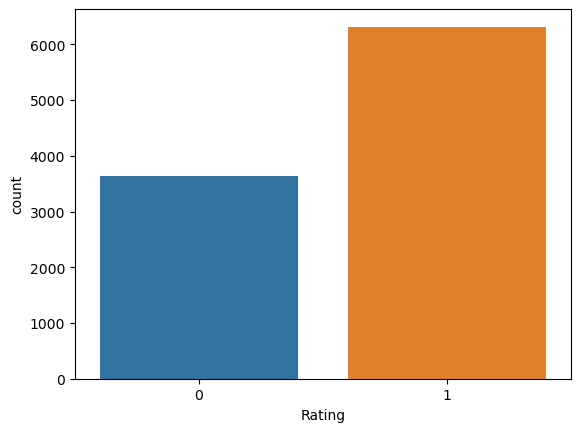

In [37]:
sns.countplot(x='Rating' , data = rr)

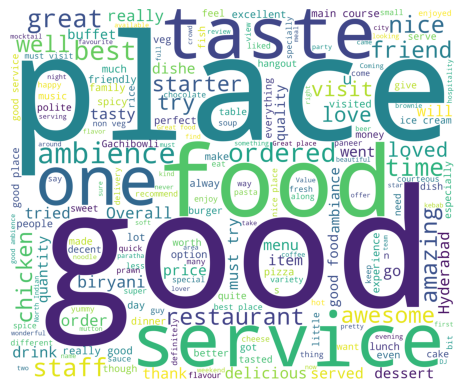

In [38]:
# word colud = sentiment positive analysis
rr1 = rr[rr['Rating']== 1]
words = ' '.join(rr1['Review'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color = 'white' , stopwords = STOPWORDS , width = 3000 , height = 2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

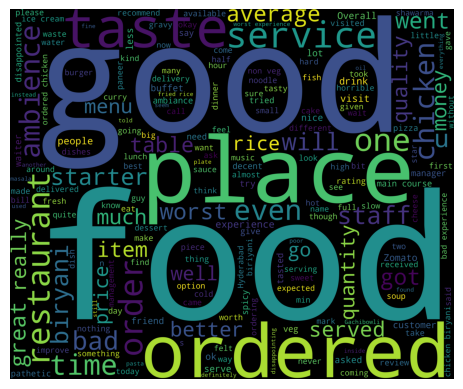

In [39]:
# wordcloud = negative sentiment analysis
rr1 = rr[rr['Rating']== 0]
words = ' '.join(rr1['Review'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color = 'black' , stopwords = STOPWORDS , width = 3000 , height = 2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
def tweet_to_words(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return ' '.join(meaningful_word)

In [41]:
def tweet_len(tweet):
    letters_only = re.sub('^[a-zA-Z]',' ',tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_word = [w for w in words if w not in stops]
    return (len(meaningful_word))

In [42]:
rr['clean_tweet'] = rr['Review'].astype(str).apply(lambda x:tweet_to_words(x))
rr['tweet_length'] = rr['Review'].astype(str).apply(lambda x:tweet_len(x))
train_data, test_data = train_test_split(rr,test_size=0.2,random_state=123)

In [43]:
train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer='word')
train_features = v.fit_transform(train_clean_tweet)
test_features = v.transform(test_clean_tweet)

# MODEL BUILDING

In [45]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier()]

In [46]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train_data['Rating'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train_data['Rating'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test_data['Rating'])*100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy) + '%')

Accuracy of LogisticRegression is: 62.73229532898041%
Accuracy of KNeighborsClassifier is: 71.12004018081366%
Accuracy of DecisionTreeClassifier is: 77.09693621295831%
Accuracy of RandomForestClassifier is: 85.18332496233049%
Accuracy of AdaBoostClassifier is: 80.96433952787544%
Accuracy of GaussianNB is: 58.6639879457559%
Accuracy of CatBoostClassifier is: 84.83174284279256%
Accuracy of SGDClassifier is: 83.92767453540935%


In [47]:
result = pd.DataFrame({'Models':Model})
result['Accuracy'] = Accuracy
result = result.sort_values(by='Accuracy' , ascending = False)
result

,Models,Accuracy
3,RandomForestClassifier,85.183325
6,CatBoostClassifier,84.831743
7,SGDClassifier,83.927675
4,AdaBoostClassifier,80.964340
2,DecisionTreeClassifier,77.096936
1,KNeighborsClassifier,71.120040
0,LogisticRegression,62.732295
5,GaussianNB,58.663988


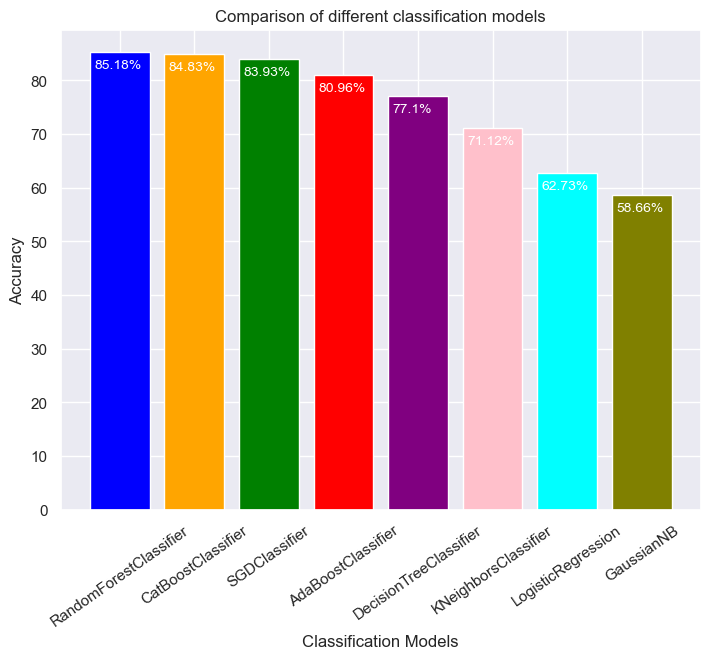

In [53]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['RandomForestClassifier' , 'CatBoostClassifier' , 'SGDClassifier' , 'AdaBoostClassifier' , 'DecisionTreeClassifier' , 'KNeighborsClassifier' , 'LogisticRegression' , 'GaussianNB']
Accuracy = result['Accuracy']
ax.bar(Models,Accuracy,color=['blue' , 'orange' , 'green', 'red' , 'purple' , 'pink' , 'cyan' , 'olive'])
for i in ax.patches:
    ax.text(i.get_x()+.06 , i.get_height()-3.0 , str(round(i.get_height(),2))+ '%' , fontsize=10 , color = 'white')
plt.title('Comparison of different classification models')
plt.ylabel('Accuracy')
plt.xlabel('Classification Models')
plt.xticks(rotation=35);